# Zillow CSV ETL process

This code serves as a blueprint for the csv ETL process. You will need to update certain field and column names in this report according to the csv file name, the metric and report under consideration, and so on. There are annotations provided throughout to guide you through the code.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Declare Variables

In [2]:
#Add inputs here, and clean csv should auto-populate
raw_csv_path = 'Resources_Raw/raw_median_sale_price_week_all.csv'
clean_csv_path = 'Resources_Clean/clean_median_sale_price_week_all.csv'
metric_name = 'Median Sale Price'

In [3]:
initial_csv = Path(raw_csv_path)
initial_df = pd.read_csv(initial_csv)
initial_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-08-05,2023-08-12,2023-08-19,2023-08-26,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07
0,102001,0,United States,country,NaN,177000.0,172000.0,173040.0,169500.0,178000.0,...,350000.0,345000.0,349000.0,345000.0,345000.0,339900.0,338975.0,332000.0,340000.0,337500.0
1,394913,1,"New York, NY",msa,NY,395000.0,407500.0,412000.0,410000.0,386000.0,...,599000.0,600000.0,598000.0,615251.0,599000.0,600000.0,585000.0,560000.0,584500.0,560000.0
2,753899,2,"Los Angeles, CA",msa,CA,459750.0,467000.0,478500.0,485000.0,461000.0,...,900250.0,900000.0,914000.0,880000.0,892000.0,875000.0,900000.0,870000.0,885000.0,890000.0
3,394463,3,"Chicago, IL",msa,IL,228000.0,220000.0,225000.0,215000.0,230000.0,...,318000.0,315000.0,315000.0,300000.0,310000.0,300500.0,299000.0,295000.0,308000.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,137500.0,132900.0,140080.0,138000.0,139536.0,...,395000.0,389000.0,380000.0,390000.0,380000.0,380000.0,377805.0,375697.0,379500.0,372500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,472500.0,727500.0,415000.0,499500.0,450000.0,437500.0,821000.0,572400.0,675000.0,565000.0
260,394674,467,"Heber, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,975546.0,1350000.0,900000.0,831282.0,720000.0,748770.0,954951.0,700000.0,1203823.0,1137499.0
261,394877,491,"Morehead City, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,342500.0,424000.0,415000.0,320000.0,408000.0,400000.0,605000.0,549000.0,522000.0,499000.0
262,394402,577,"Boone, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,532500.0,325000.0,480000.0,550000.0,340000.0,428750.0,672500.0,416000.0,394750.0,493500.0


# Remove Nulls from DataFrame

In [4]:
#Checks if any Date column has a null for a given RegionName

#looks at column range from 6th column to last column in df
date_columns_slice = initial_df.iloc[:, 5:-1]

#looks at every row in this column range, and checks for null values
date_range_columns = initial_df.loc[:,date_columns_slice.columns] 
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
null_check_df = initial_df.loc[~null_check, :]

#Preview
null_check_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-08-05,2023-08-12,2023-08-19,2023-08-26,2023-09-02,2023-09-09,2023-09-16,2023-09-23,2023-09-30,2023-10-07
2,753899,2,"Los Angeles, CA",msa,CA,459750.0,467000.0,478500.0,485000.0,461000.0,...,900250.0,900000.0,914000.0,880000.0,892000.0,875000.0,900000.0,870000.0,885000.0,890000.0
3,394463,3,"Chicago, IL",msa,IL,228000.0,220000.0,225000.0,215000.0,230000.0,...,318000.0,315000.0,315000.0,300000.0,310000.0,300500.0,299000.0,295000.0,308000.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,137500.0,132900.0,140080.0,138000.0,139536.0,...,395000.0,389000.0,380000.0,390000.0,380000.0,380000.0,377805.0,375697.0,379500.0,372500.0
7,394974,7,"Philadelphia, PA",msa,PA,191000.0,205000.0,185000.0,188250.0,199000.0,...,335000.0,337400.0,335500.0,331000.0,327000.0,315000.0,310550.0,310000.0,325000.0,315000.0
8,394856,8,"Miami, FL",msa,FL,250000.0,235000.0,235000.0,240000.0,245000.0,...,453750.0,430000.0,445000.0,435000.0,445000.0,449500.0,450000.0,430000.0,450000.0,435000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,394747,167,"Kingsport, TN",msa,TN,90900.0,72750.0,97000.0,108000.0,102000.0,...,234450.0,230050.0,220000.0,240000.0,240000.0,228500.0,240000.0,237500.0,215000.0,229000.0
162,394543,171,"Duluth, MN",msa,MN,125000.0,140000.0,104500.0,108750.0,116365.0,...,230000.0,212000.0,238000.0,240000.0,253500.0,247500.0,262250.0,229950.0,240000.0,192000.0
169,394447,179,"Cedar Rapids, IA",msa,IA,115250.0,116500.0,111250.0,116500.0,113500.0,...,204500.0,191250.0,204250.0,227000.0,201500.0,200000.0,210500.0,221200.0,215000.0,210250.0
184,845160,198,"Prescott Valley, AZ",msa,AZ,245000.0,205000.0,222500.0,297500.0,242000.0,...,525000.0,550000.0,521139.0,474900.0,458000.0,585000.0,483000.0,504000.0,439900.0,462000.0


# Condense Date Columns to Single Column

In this section, we condense the multiple date columns into a single 'date' column. This allows for easier data visualization moving forward.

In [5]:
condensed_rough_df = pd.DataFrame(null_check_df)

new_rows = []

#For loop to iterate through each RegionName
for _, row in condensed_rough_df.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterate through each Date Column within a given RegionName
    for date_column in condensed_rough_df.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list.
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'list'
condensed_df = pd.DataFrame(new_rows, columns=
                             ['Region ID',
                              'Size Rank',
                              'Region Name',
                              'Region Type',
                              'State Name',
                              'Date',
                              metric_name])


#create moving average column for each Region.
window_size = 3 #time period (weeks)
condensed_df[f'{metric_name} Rolling Avg'] = condensed_df.groupby('Region Name')[metric_name].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
condensed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Sale Price,Median Sale Price Rolling Avg
0,753899,2,"Los Angeles, CA",msa,CA,2008-02-02,459750.0,NaN
1,753899,2,"Los Angeles, CA",msa,CA,2008-02-09,467000.0,NaN
2,753899,2,"Los Angeles, CA",msa,CA,2008-02-16,478500.0,468416.666667
3,753899,2,"Los Angeles, CA",msa,CA,2008-02-23,485000.0,476833.333333
4,753899,2,"Los Angeles, CA",msa,CA,2008-03-01,461000.0,474833.333333
...,...,...,...,...,...,...,...,...
67972,395009,237,"Punta Gorda, FL",msa,FL,2023-09-09,340000.0,315916.666667
67973,395009,237,"Punta Gorda, FL",msa,FL,2023-09-16,300000.0,307666.666667
67974,395009,237,"Punta Gorda, FL",msa,FL,2023-09-23,291500.0,310500.000000
67975,395009,237,"Punta Gorda, FL",msa,FL,2023-09-30,300000.0,297166.666667


# Analysis Testing

Section I created to test initial clean dataframe. Use only as a referance for chart output.

In [6]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = condensed_df['Region Name'].isin(MSA_filter)
filtered_df = condensed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Sale Price,Median Sale Price Rolling Avg
0,753899,2,"Los Angeles, CA",msa,CA,2008-02-02,459750.0,NaN
1,753899,2,"Los Angeles, CA",msa,CA,2008-02-09,467000.0,NaN
2,753899,2,"Los Angeles, CA",msa,CA,2008-02-16,478500.0,468416.666667
3,753899,2,"Los Angeles, CA",msa,CA,2008-02-23,485000.0,476833.333333
4,753899,2,"Los Angeles, CA",msa,CA,2008-03-01,461000.0,474833.333333
...,...,...,...,...,...,...,...,...
2452,394514,4,"Dallas, TX",msa,TX,2023-09-09,380000.0,383333.333333
2453,394514,4,"Dallas, TX",msa,TX,2023-09-16,377805.0,379268.333333
2454,394514,4,"Dallas, TX",msa,TX,2023-09-23,375697.0,377834.000000
2455,394514,4,"Dallas, TX",msa,TX,2023-09-30,379500.0,377667.333333


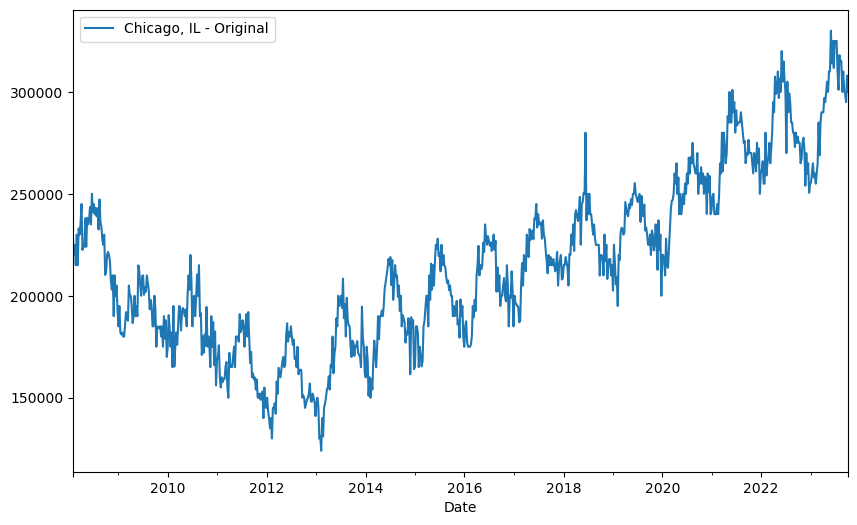

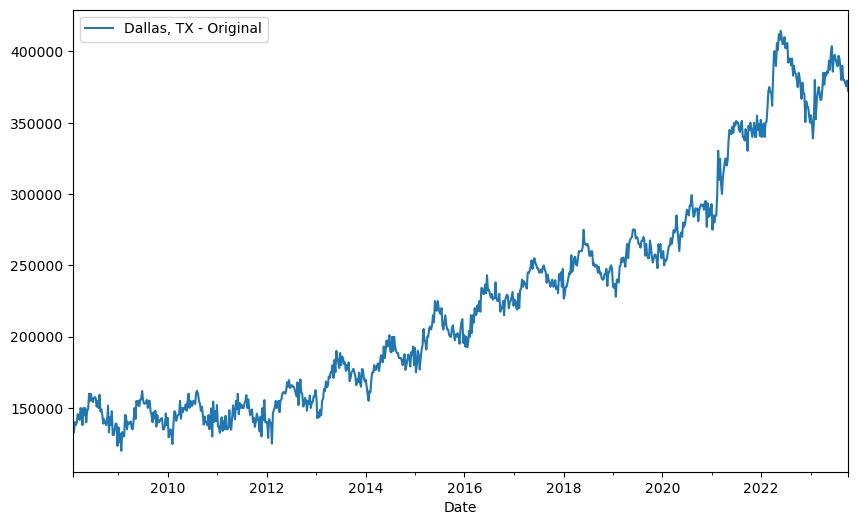

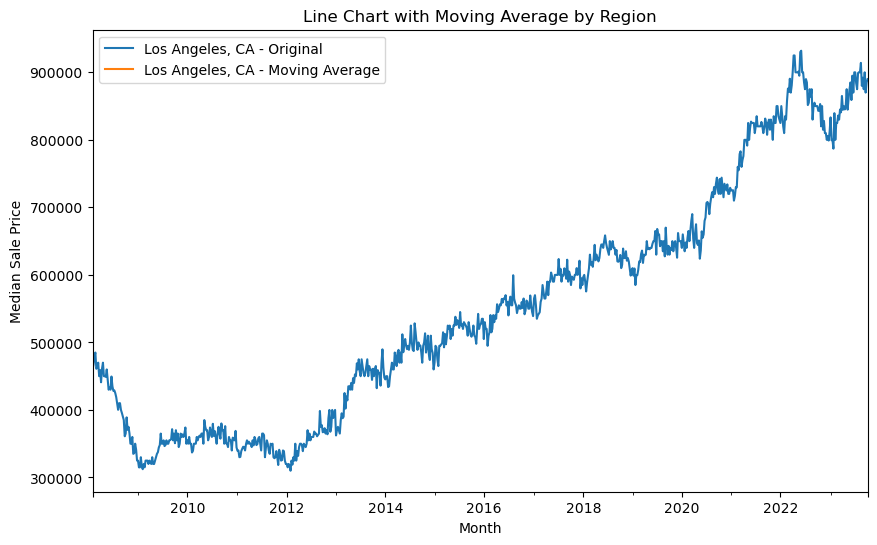

In [7]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y=metric_name, label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data[f'{metric_name} Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel(metric_name)
plt.legend()
plt.show()

# Generate Clean CSV File

In [8]:
#IMPORTANT -- CHANGE CSV OUTPUT NAME RELEVANT REPORT
condensed_df.to_csv(clean_csv_path, index=False)